# Analysis of China's Population.

## Problem

The impact of changes in China's childbirth policies on China's population and gender ratios.

## Introduction

Around the 1960s, China saw a huge leap in population due to low death rates and a spike in birth rates. With concern for the growth in population, China began its wan, xi, shao campaign in 1970. Wan, xi, shao meant later, longer, and fewer, in reference to the emphasis on later marriages, longer time between births, and fewer births. This campaign was not just propaganda and persuasion, but it relied heavily on closely monitoring women on their contraceptive use, menstrual cycles, and birthing records. Women would be pressured into getting abortions, sterilized, or intrauterine devices (IUDs) if they had too many children [10]. In 1980, policymakers instituted the one-child policy. This policy restricted families to only birth one child and heavily fined those that raised more than one. Other enforcement methods also included governmental pushes for contraceptive, as well as even more extreme mandatory sterilization and forced abortions [1,3]. 

As of recent times, China sits at around 1.4 billion people as the number one most populous country [2]. The growth of the population seems to have died down thus far, and policymakers have relaxed the one-child policy in 2013 and proceeded to abolish it in 2016. Now China is allowing for each family to have two children [1]. Though the policy has ended, lasting effects can be seen in the population. Today, China is facing issues with an incredibly high male to female ratio [7]. The one-child policy may have expounded this issue. Due to the preference for male laborers in rural areas, and the limit on children, many rural families likely prefer for their one child to be male. There have been a number of cases of voluntary sex-selective abortions in rural areas, where fetuses are aborted after being determined female [6,7]. 

I would like to explore if there is a connection between changes in the childbirth policies and changes in gender ratios and number of sex-selective abortions across the years. 


## Questions and Justification

**Has China's population growth slowed in recent years and how might it be projected to grow?**

- China still faces many issues of overpopulation. Cities are crowded and the population is putting a strain on natural resources. Overpoplulation has contributed to growing water and air pollution as well [4]. Analyzing how the population is proceeding is important in determining whether the growth is sustainable.

**Were there any differences in the population / population growth before and after the repeal of the one-child policy?**
    
- As the one-child policy was such a long-lasting and widely enforced policy, I hypothesis that there would at least be some lasting effects. Exploring this question may give insight on how the policy has effected the population. Would be good to examine population by age as well.

**What does the gender ratio in china look like across the years and do changes in childbirth policies seem to have an effect?**

- China currently has a higher male to female ratio and there has been evidence of sex-selective abortions in rural areas [6,7]. Examining how this has changed over time may reveal what factors effect the issue. 

**How does China's total population, population growth, and gender ratio over time compare to other populous countries?**

- Asking this along the way helps contextualize how the changes in things may or may not be effected by other factors.


## Datasets:

- [Population and other data for China across years](https://data.worldbank.org/country/china?view=chart)
    - Data on population, life expectancy, climate change, and more for China from 1960-2019. 
- [Gender ratio data](https://ourworldindata.org/gender-ratio)
    - Information about sex ratios, birth and mortality rates by sex, life expectancy by sex, and more for all countries across 1962-2017.

## Concerns and Considerations Moving Forward

If it is found that the population is no longer growing at a alarming rate, people may deem this as a success of the one-child policy. We should be careful to not ignore the negative consequences of such an impactful policy. Vice-versa, if female birth mortality is found to have increased under the policy, we should also be wary of jumping to overly demonizing the government and/or policy. Effects of policies are hard to predict, and reasons behind sex-selective abortions stretch beyond more than just one policy.

There are some concerns in attributing too much of the change in population to changes in the one-child policy. I would like to see if some of the changes line up with the timeline of changes to the policy, but this does not mean the policy is the sole or even main cause of population changes. We should keep in mind that other things, like economic and cultural changes, may have an effect on birth rates and gender ratios in China. Changes in policy may also be partly reactionary to changes in population too, so that is another thing to keep in mind.

Other concerns with this information is with other countries with higher population issues or in similar situations to China may look at the data and take China and their policies as a model. Again, there are many factors that effect population growth and demographics and solutions for one country may not have the same desired effects for another country. Even with similar population issues and circumstances, there can be a lot of variation in culture that can effect the reception of changes.  

In [127]:
# Setting up
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

from scipy import stats as scipystats
#import statsmodels.api
#from statsmodels import stats as smstats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import geopandas
from geopandas import GeoDataFrame

# Geopandas set up
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'Country Code', 'gdp_md_est', 'geometry']
location = pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')

# Global graph styles
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("ticks")

# Comparing other high population countries nearby and also the U.S. for contrast
countries = ["China", "India", "United States", "Pakistan"]

# Setting up data
popTotal = pd.read_csv('data/PopulationTotal_All.csv',sep='\t',skiprows=4)
popTotal = popTotal.drop(columns=["Indicator Name", "Indicator Code"]).copy()
popTotal = pd.melt(popTotal, id_vars=["Country Name", "Country Code"], var_name='Year', value_name="Population Total").copy()
popTotal["Year"] = popTotal["Year"].astype(int).copy()

popGrowth = pd.read_csv('data/PopulationGrowth_All.csv',sep=',',skiprows=4)
popGrowth = popGrowth.drop(columns=["Indicator Name", "Indicator Code", "Unnamed: 65"]).copy()
popGrowth = pd.melt(popGrowth, id_vars=["Country Name", "Country Code"], var_name='Year', value_name="Population Growth").copy()
popGrowth["Year"]= popGrowth["Year"].astype(int).copy()

sexRatio = pd.read_csv('data/sex-ratio-at-birth.csv',sep=',',skiprows=0) 
sexRatio = sexRatio.rename(columns={'Sex ratio at birth (male births per female births)':'Sex Ratio', 'Entity' : 'Country Name', 'Code':'Country Code'})
# Ratio is in units of every 100 females. Divide by 100 to get 1:1 ratio
sexRatio['Sex Ratio'] = sexRatio['Sex Ratio'].div(100)


## Comparing Total Population
First let's take a look compare the total population count of China to that of neighboring similarly large population countries of India and Pakistan. We'll also contrast it with the United States to see what differences we may find. 

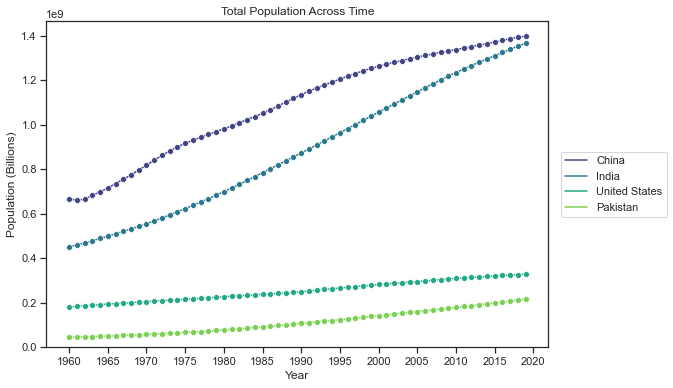

In [65]:
# Line plot
fig, ax = plt.subplots()
df = popTotal[popTotal['Country Name'].isin(countries)]
df_plot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = df,
                        hue = 'Country Name',
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        hue_order = countries, 
                        palette = 'viridis'
                      )

# Label and axis settings
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
df_plot.set(xlabel='Year', ylabel="Population (Billions)", title="Total Population Across Time")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.ylim(0)
plt.show()

China is the most populous country, with India as a close second. The third most populous is the United States, floating at just about 1/3 of China's population in 2019. Pakistan is comes in fifth. 

We see here that China consistently stays the most populous across the years and should thus be more resistant to apparent fluctuations in population growth. This is not the case though as we can see a rather wavier and inconsistent pattern with China's total population. 

## Regression Lines
Let's take a look at some best fit lines for these countries to get a clearer picture of the population fluctuation.

Regression Lines: 

China
R^2: 0.9749416187485966
Slope: 13142568.769102529
Intercept: -25059270899.462814

India
R^2: 0.9956201264767867
Slope: 16474505.296415677
Intercept: -31895441569.81899

United States
R^2: 0.9963453743349272
Slope: 2567184.157460406
Intercept: -4853639109.717478

Pakistan
R^2: 0.9774667137586983
Slope: 2982501.722228397
Intercept: -5819263497.256729



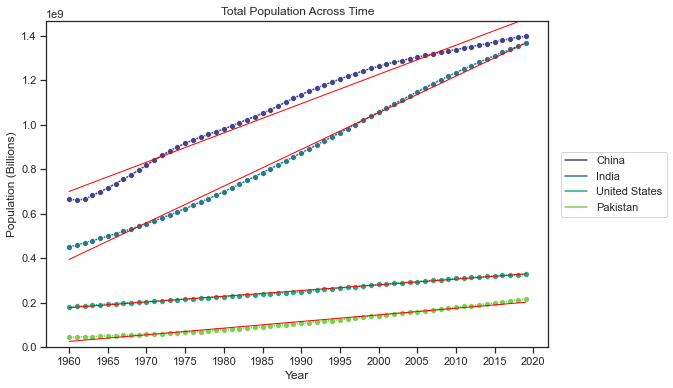

In [94]:
chinaTotal = popTotal[popTotal["Country Name"] == "China"].sort_values("Year")
chinaTotal.head(10)

# Function for linear regression
def linReg(name, yearMin, yearMax):
    model=LinearRegression(fit_intercept=True)
    df = popTotal[ (popTotal["Year"] >= yearMin) & (popTotal["Year"] <= yearMax)] 
    df = df[df["Country Name"] == name]
    x = df[["Year"]]
    y = df[["Population Total"]]
    model.fit(x, y)
    score = model.score(x, y)
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    return (slope, intercept, score)

# Graphing 
fig, ax = plt.subplots()
df = popTotal[popTotal['Country Name'].isin(countries)]
df_plot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = df,
                        hue = 'Country Name',
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        hue_order = countries, 
                        palette = 'viridis'
                      )

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
df_plot.set(xlabel='Year', ylabel="Population (Billions)", title="Total Population Across Time")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.ylim(0)

# Calculating regression lines and fit
print("Regression Lines: \n")
for country in countries:
    slope,intercept,score = linReg(country, 1960, 2019)
    print(country + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
    xfit = np.linspace(1960,2019,100) # returns every split 100 nums from 0 to 10
    yfit = slope * xfit + intercept
    plt.plot(xfit,yfit, color="red", zorder=2, linewidth=1)

plt.show()

Every country has a fairly linear trend in population (.97-.99 correlation coefficients), but we can see clear departures from the linear regression for China. From 1960 to about 1975 the slope of the line is much steeper than that of the regression line. The population is grew faster then and in the most recent years the slope starts to flatten out. 

Let's break down the regression lines for China more to see how the population grows between timeframes. 

The turning points in China's childbirth policies are:
* 1970s - China starts its *later, longer, fewer* campaign (wan, xi, shao campaign) 
* 1980s - China first implements the one child policy
* 2013 - China allows couples with one partner who was a single child to have two children.
* 2015 - China replaces one-child policy with two-child policy.

We will examine three major timeframes, 1960-1970 when there were no limitations on childbirth, 1970-2013 when chinese officials started thoroughly enforcing its childbirth limitations, and 2013-2019 when the policies become more lenient. 

The following takes the data from these timeframes and uses it to predict population totals / projects it across the rest of the years.

China 1960-1970
R^2: 0.9617917620246073
Slope: 16424545.454545463
Intercept: -31549882272.72729

China 1970-2013
R^2: 0.9831461546016537
Slope: 12728536.645525008
Intercept: -24216343115.92669

China 2013-2019
R^2: 0.997205463455125
Slope: 6896428.57142857
Intercept: -12524860714.285711



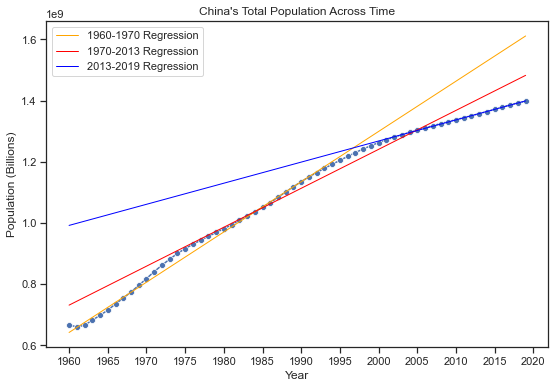

In [110]:
# Graphing
fig, ax = plt.subplots()
chinaTotalPlot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = chinaTotal,
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        palette = "Greys"
)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
chinaTotalPlot.set(xlabel='Year', ylabel="Population (Billions)", title="China's Total Population Across Time")

# Regression using a certain time frame to predict
def linRegYear(start, end, c):
    slope,intercept,score = linReg("China", start, end)
    print("China "+ str(start)+ "-" +str(end) + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
    xfit = np.linspace(1960,2019,100)
    yfit = slope * xfit + intercept
    plt.plot(xfit, yfit, color=c, zorder=2, linewidth=1, label = str(start)+ "-" + str(end) + " Regression")

linRegYear(1960,1970, "orange")
linRegYear(1970,2013, "red")
linRegYear(2013,2019, "blue")

plt.legend()
plt.show()

As we noted before, the beginning few years had a steep slope. From 1960 - 1970, when there were no restrictive policies we see the greatest projected growth across the three timeframes. After 1970, the slope lowers and growth seems to die down. Though this might not be a direct cause of the childbirth policies, it seems like there is at least some connection in that, when comparing to India, which has a very similar population size, high growth rate in the early years, and no national childbirth policies, China's population slows it's growth in the latest years while India's does not. 

A surprising find is that for 2013-2019, ther projected slope lowers even further. Due to the more lax policies around childbirth, one would think the population would climb up more or bounce back now, but it does not. It may be that 6 years is too early to see any changes, or that other factors may be at play. Though, if China's population continues with this trend, while it may help with overpopulation issues, it may also lead to issues of an aging population in the future. This could lead to not having enough young individuals to support the elderly, so that is one concern to look out for. 

## Population growth
Next we examine population growth from year to year. This statistic is basically telling us what percentage the population grew by the year prior. So if there was 1000 people last year and 1100 people this year, the population growth rate is 100/1000 = 10% 

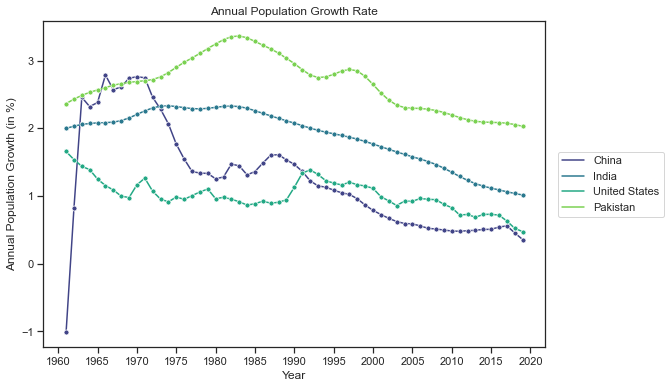

Standard deviation for population growth rate from 1962 - 2019

China
0.7401471303222537 

India
0.4171895962605429 

United States
0.21903532953775012 

Pakistan
0.396099577391946 



In [78]:
# Graphing
fig, ax = plt.subplots()
chinaGrowthPlot = sns.lineplot(x = 'Year',
                        y = 'Population Growth',
                        data = popGrowth[popGrowth["Country Name"].isin(countries)],
                        hue = 'Country Name', 
                        hue_order = countries, 
                        markers = True,
                        dashes = False,
                        markersize = 5,
                        marker = "o",
                        palette = "viridis"
)                  

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
chinaGrowthPlot.set(xlabel='Year', ylabel="Annual Population Growth (in %)", title="Annual Population Growth Rate")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.show()

print("Standard deviation for population growth rate from 1962 - 2019\n")
for country in countries:
    print(country)
    print(popGrowth[ (popGrowth["Country Name"] == country) & (popGrowth["Year"] > 1961) ]["Population Growth"].std() , '\n')

Here we can confirm the major fluctuations in China's population growth. China has by far the highest standard deviation for population growth among the four countries, even with the exclusion on the 1961 outlier. This indicates higher variability for population growth rates.

These changes in growth rates also correspond somewhat to policy changes. Most prominently we see a huge drop in growth rates from 1970 to about 1980. This is most likely due to a major decline in fertility rates, which other researchers have linked to the wan xi shao campaign [9,10]. It is interesting to note that, while controlling population growth in China has mostly been attributed to the one child policy, the sharpest decline in population growth came with the wan xi shao era, before the one child policy even existed. 

Addressing the huge spike in growth rates in 1961-1962. It is possible that this could be a hiccup in data collection because of how early in time this is. Another explanation may be the Great Chinese Famine ending around 1961 and the population is just bouncing back from that. Either way, it's unlikely that childbirth policies contributed to this, as there were no major implementations during this time. 


## Sex Ratios at Birth
Now let's take a look at sex ratios at birth across countries to get a better look at the sex selective abortion situation. The sex ratio statistic gives the number of infants born male for each infant born female. Sex ratios tend to be slightly higher than 1:1 naturally, but much higher ratios indicate other factors at play. 

Here's the latest 2017 data on sex ratios at birth. 

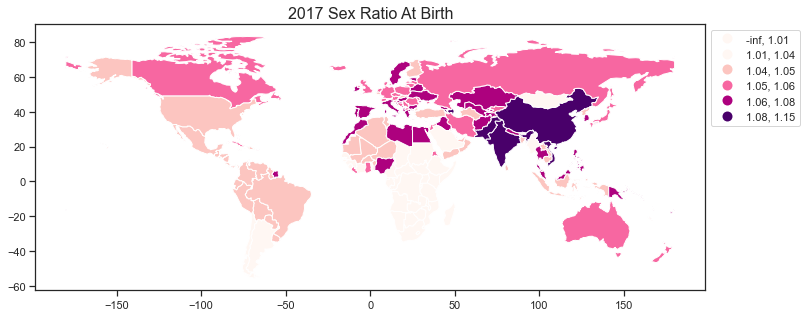

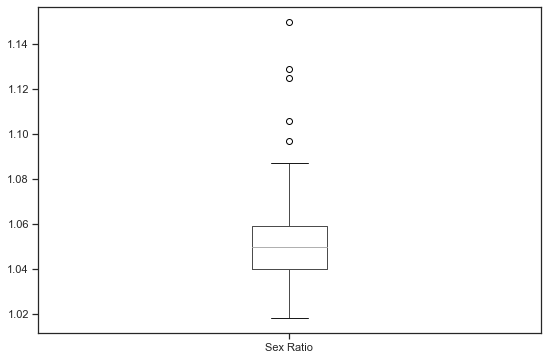

In [138]:
# Map creation function
def makeMap(df, columnName, sch ):
    df = pd.merge(df, world, on='Country Code')
    df = df.set_index('Country Name').join(location.set_index('name')) 
    df = GeoDataFrame(df)

    ax = df.plot(column=columnName, 
                scheme=sch,
               figsize=(12, 8),
               legend=True,cmap='RdPu')
    return ax

sexRatio2017 = sexRatio[ sexRatio["Year"] == 2017 ].copy()

ax = makeMap(sexRatio2017, "Sex Ratio", "boxplot")
plt.title('2017 Sex Ratio At Birth', fontsize=16)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,1))
plt.show()

# Box plot
sexRatio2017.boxplot( column =['Sex Ratio'], grid = False)
plt.show()

With the above, we observe that China actually falls within the upper outliers of sex ratios, alongside four other countries. 

In [151]:
sexRatio2017[sexRatio2017["Sex Ratio"] > 1.09].sort_values("Sex Ratio", ascending = False)

,Country Name,Country Code,Year,Sex Ratio
836,China,CHN,2017,1.150
166,Armenia,ARM,2017,1.129
250,Azerbaijan,AZE,2017,1.125
2100,India,IND,2017,1.106
4898,Vietnam,VNM,2017,1.097


We discover that China is actually the country with the highest number of infants born male to infants born female.

## Sex Ratio vs Population Growth

Here, we take a look at correlation between sex ratios and population growth rates across 1962 - 2017 for the top outliers in sex ratios to determine if there is some kind of connection.  

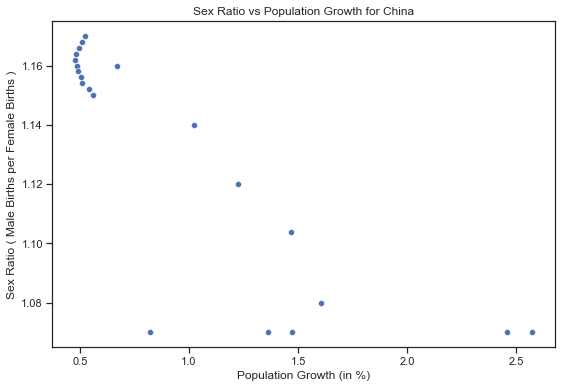

Correlation Coeff:  -0.8406269636143416
P-Value:  0.0000018371


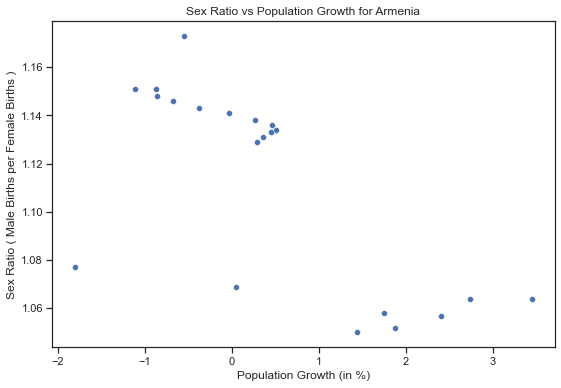

Correlation Coeff:  -0.6922413739524402
P-Value:  0.0005066179


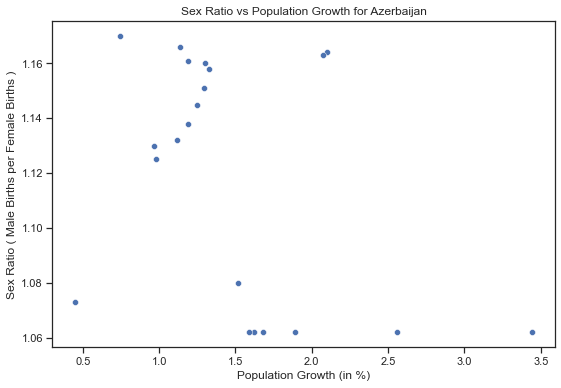

Correlation Coeff:  -0.39795855090376314
P-Value:  0.0739951278


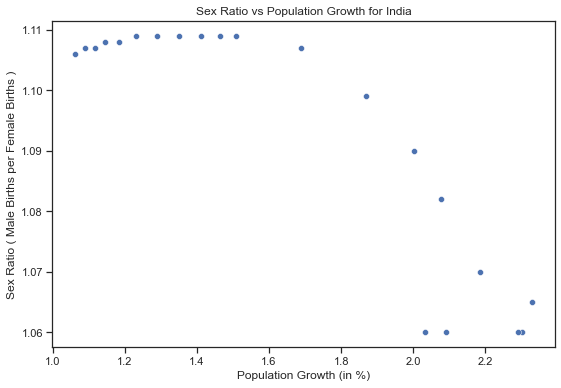

Correlation Coeff:  -0.8894418921581125
P-Value:  0.0000000695


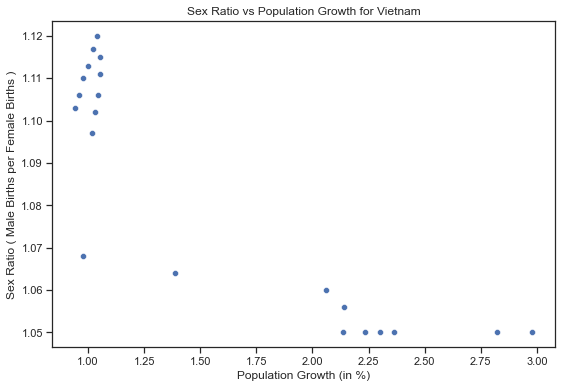

Correlation Coeff:  -0.8769347300774432
P-Value:  0.0000001828


In [154]:
def displayCorrelation(country):
    df = sexRatio.loc[sexRatio['Country Name'] == country].sort_values("Year").copy()
    temp = popGrowth[ (popGrowth["Country Name"] == country) & popGrowth["Year"].isin(sexRatio["Year"]) ].sort_values("Year")["Population Growth"].copy()
    df["Population Growth"] = temp.values
    df = df.dropna()
    plot = sns.scatterplot(data=df, y="Sex Ratio", x="Population Growth")
    plot.set(xlabel='Population Growth (in %)', ylabel="Sex Ratio ( Male Births per Female Births )", title="Sex Ratio vs Population Growth for " + country)
    plt.show()
    corr, pval = scipystats.pearsonr(df['Population Growth'], df['Sex Ratio'])
    print("Correlation Coeff: ", corr)
    print("P-Value: ", '{:0.10f}'.format(pval))
    
displayCorrelation("China")    
displayCorrelation("Armenia")
displayCorrelation("Azerbaijan")
displayCorrelation("India")
displayCorrelation("Vietnam")

There is mostly a negative correlation between these variables, which means as the lower population growth for a year, usually comes along with more male births than female births. This does not mean that low poplation growth *causes* more male to female births though. This is indicating a relationship. It is possible that high sex ratios may be playing into lower growth rates, as the male to female balance in the population is thrown off. It is also possible that the two variables are connected to another factor that effects them both. 

The initial thought for looking into this was that, for China, policies may have led to lower population growth rates and may also play a role in higher sex ratios for specific years. However, this negative correlation can be seen in all of the outlying countries with high sex ratios, and most of them are not likely due to chance (p < .05). So there may be some connection between population and sex ratio, but this does not give any indicative info on the relationship between restrictive childbirth policies and sex ratios.

It is also curious to note that the countries with the highest populations don't necessarily have high sex ratios. High population count does not necessarily exacerbate male : female birth balances. There seems to be much more effecting sex ratios, such as culture, economic conditions, government, as well as policies, than just population growth and overpopulation. 

Thus, this part of the analysis gives inconclusive results. There are too many factors at play to decisively say exactly what contributes to China's strangely high sex ratio. 

## Sex Ratio at Birth Over Time

(1.0, 1.18)

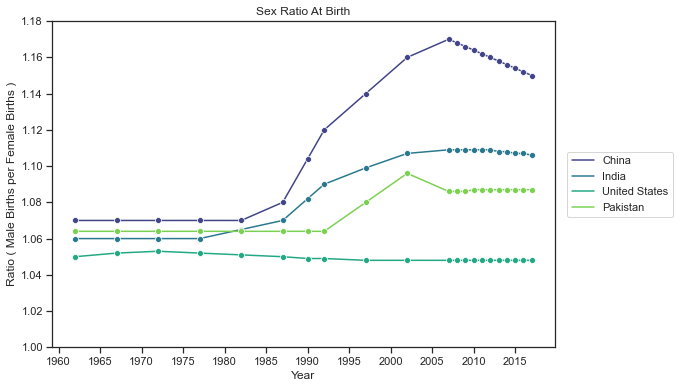

In [146]:
fig, ax = plt.subplots()
chinaRatioPlot = sns.lineplot(
                        x = 'Year',
                        y = 'Sex Ratio',
                        data = sexRatio[sexRatio['Country Name'].isin(countries)],
                        hue = 'Country Name', 
                        hue_order = countries, 
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        palette = "viridis"
)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
chinaRatioPlot.set(xlabel='Year', ylabel="Ratio ( Male Births per Female Births )", title="Sex Ratio At Birth")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.ylim(1,1.18)

## Messing with Geopandas

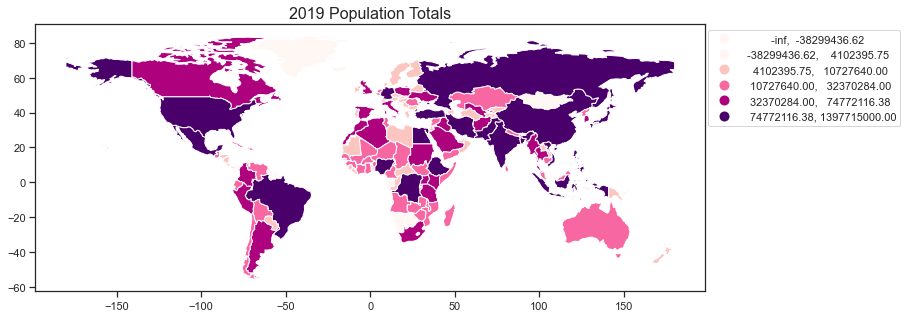

In [120]:
import geopandas
from geopandas import GeoDataFrame

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'Country Code', 'gdp_md_est', 'geometry']
location = pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')

def makeMap(df, columnName, sch ):
    df = pd.merge(df, world, on='Country Code')
    df = df.set_index('Country Name').join(location.set_index('name')) 
    df = GeoDataFrame(df)

    ax = df.plot(column=columnName, 
                scheme=sch,
               figsize=(12, 8),
               legend=True,cmap='RdPu')
    return ax

pop2019 = popTotal[ popTotal["Year"] == 2019 ].copy()
ax = makeMap(pop2019, "Population Total", "boxplot")

plt.title('2019 Population Totals',fontsize=16)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3,1))
plt.show()

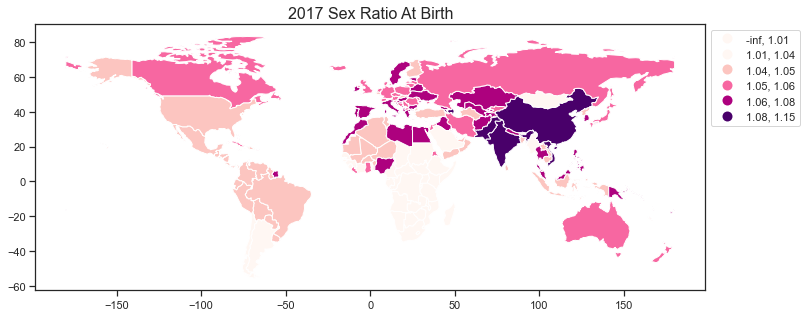

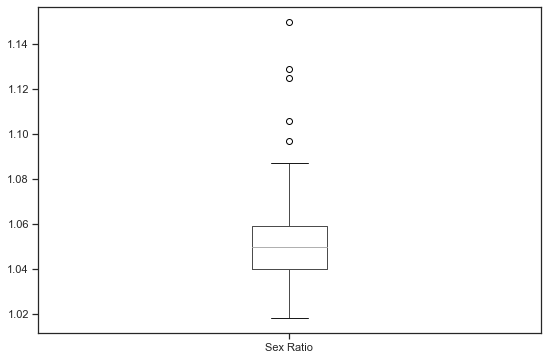

In [133]:
sexRatio2017 = sexRatio[ sexRatio["Year"] == 2017 ].copy()

ax = makeMap(sexRatio2017, "Sex Ratio", "boxplot")
plt.title('2017 Sex Ratio At Birth', fontsize=16)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,1))
plt.show()

sexRatio2017.boxplot( column =['Sex Ratio'], grid = False)
plt.show()

* According to this map plot, since I'm doing it with 'boxplot' 
    * China, India, Pakistan, and like 2 other countries are in the outliers section for sex ratio at birth, past 75 percentile and max 
    * Showing just how out there the ratio is compared to everywhere else

,Country Name,Country Code,Year,Sex Ratio
4835,Uzbekistan,UZB,2017,1.081
3512,Pakistan,PAK,2017,1.087
4898,Vietnam,VNM,2017,1.097
2100,India,IND,2017,1.106
250,Azerbaijan,AZE,2017,1.125
166,Armenia,ARM,2017,1.129
836,China,CHN,2017,1.150


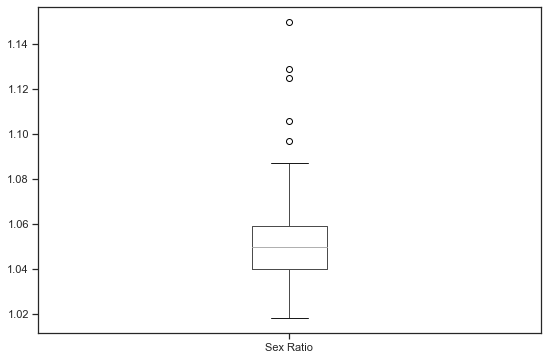

In [132]:

sexRatio2017[sexRatio2017["Sex Ratio"] > 1.08].sort_values("Sex Ratio")

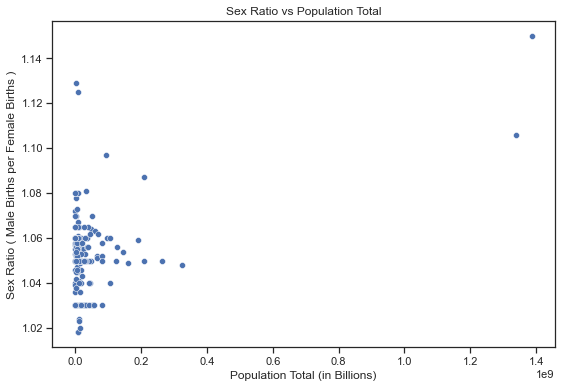

In [130]:
df = popTotal[ popTotal["Year"] == 2017 ].copy()
df = pd.merge(df, sexRatio2017, on='Country Code')
df = df.dropna()

plot = sns.scatterplot(data=df, y="Sex Ratio", x="Population Total")
plot.set(xlabel='Population Total (in Billions)', ylabel="Sex Ratio ( Male Births per Female Births )", title="Sex Ratio vs Population Total")
plt.show()

# Under five mortality
* this doesn't particularly tell me much since it's including all children under 5
* not sure if it's including the at birth stats or not, not enough info
* also starting from 1990, so that's not too useful either

In [ ]:
mortalityRate = pd.read_csv('data/UnderFiveMortality.csv',sep='\t',skiprows=2) 

df_plot = sns.lineplot(x = 'Year',
                        y = 'Value',
                        data = mortalityRate[mortalityRate["Country"] == "China"],
                        hue = 'Sex',
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6, 
                        palette = 'viridis'
                      )
plt.show()

df_plot = sns.lineplot(x = 'Year',
                        y = 'Value',
                        data = mortalityRate[mortalityRate["Country"] == "India"],
                        hue = 'Sex',
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6, 
                        palette = 'viridis'
                      )
plt.show()


## Sources

1. “One-Child Policy.” Wikipedia, Wikimedia Foundation, 30 Apr. 2021, https://en.wikipedia.org/wiki/One-child_policy.
2. “People's Republic of China.” Data Commons, Data Commons, https://datacommons.org/place/country/CHN.
3. Fensom, Anthony. “Dangerous Demographics: China's Population Problem Will Eclipse Its Ambitions.” The National Interest, The Center for the National Interest, 16 Sept. 2019, https://nationalinterest.org/feature/dangerous-demographics-chinas-population-problem-will-eclipse-its-ambitions-80961
4. G, Qu, and Li J. “An Outline of Study on China's Population / Environment Issues.” China Population Newsletter, U.S. National Library of Medicine, https://pubmed.ncbi.nlm.nih.gov/12286553/.
5. Wang, Feng, and Eswar Prasad. “China's Population Destiny: The Looming Crisis.” Brookings, Brookings, 28 July 2016, www.brookings.edu/articles/chinas-population-destiny-the-looming-crisis/.
6. Pandey, Kiran. “Selective Abortions Killed 22.5 Million Female Foetuses in China, India.” Down To Earth, https://www.downtoearth.org.in/news/health/selective-abortions-killed-22-5-million-female-foetuses-in-china-india-64043.
7. Zhu, W. X., et al. “China's Excess Males, Sex Selective Abortion, and One Child Policy: Analysis of Data from 2005 National Intercensus Survey.” BMJ, vol. 338, no. apr09 2, 2009, doi:10.1136/bmj.b1211, https://www.researchgate.net/publication/24270887_China's_excess_males_sex_selective_abortion_and_one_child_policy_Analysis_of_data_from_2005_national_intercensus_survey
8. https://www.census.gov/popclock/print.php?component=counter
9. https://www.jstor.org/stable/2061373?seq=1
10. https://scholar.harvard.edu/files/martinwhyte/files/challenging_myths_published_version.pdf
